In [450]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

In [451]:
df = pd.read_csv('data\proposicoes_2013-2024_final_pres_cam.csv')
df

,nomeProposicao,idProposicao,partidoAutor,DataApresentacao,Ano,Administração e Políticas Públicas,Desenvolvimento Social e Urbano,Direitos e Justiça,Economia e Desenvolvimento Sustentável,Infraestrutura e Gestão de Recursos,VirouLei,Influencia,Aliado,Oposição,Partido_Pres_Cam,PPC_igual_partidoAutor
0,PL 4926/2013,564574,PR,2013-02-04,2013,0,1,0,0,0,0,0.077973,1,0,PMDB,0
1,PL 4931/2013,564595,PR,2013-02-04,2013,1,1,0,0,1,0,0.024691,1,0,PMDB,0
2,PL 4928/2013,564579,PSB,2013-02-04,2013,0,1,0,0,0,0,0.025341,1,0,PMDB,0
3,PL 4936/2013,564610,PR,2013-02-05,2013,0,0,0,1,0,0,0.148148,1,0,PMDB,0
4,PL 4937/2013,564611,PSD,2013-02-05,2013,0,0,0,1,0,0,0.033138,1,0,PMDB,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7956,PL 3027/2024,2450707,PT,2024-08-02,2024,0,0,0,1,1,1,0.097466,1,0,PP,0
7957,PL 3117/2024,2452037,PT,2024-08-13,2024,1,0,0,0,0,1,0.083821,1,0,PP,0
7958,PL 3148/2024,2452628,PSB,2024-08-13,2024,0,1,0,0,0,1,0.132554,1,0,PP,0
7959,PL 3266/2024,2454377,UNIÃO,2024-08-21,2024,0,1,0,1,0,0,0.011696,1,0,PP,0


- As melhores features

In [452]:
from sklearn.feature_selection import chi2

colunas = df.columns.tolist()
x = df[colunas[5:-2]]
y = df[colunas[-2]]

# Supondo que 'x' são as features e 'y' é o rótulo alvo
chi_scores = chi2(x, y)

# DataFrame com os scores de chi2
feature_scores = pd.DataFrame({
    'Feature': x.columns,
    'Score': chi_scores[0]
})

feature_scores = feature_scores.sort_values(by='Score', ascending=False)
feature_scores

,Feature,Score
8,Oposição,194.354064
2,Direitos e Justiça,77.334109
1,Desenvolvimento Social e Urbano,58.634139
5,VirouLei,39.696308
0,Administração e Políticas Públicas,32.502990
3,Economia e Desenvolvimento Sustentável,23.689908
7,Aliado,18.025220
4,Infraestrutura e Gestão de Recursos,14.782862
6,Influencia,0.699401


- Analise

In [453]:
df['Partido_Pres_Cam'].unique()

array(['PMDB', 'PP', 'DEM'], dtype=object)

In [454]:
df['PPC_igual_partidoAutor'].value_counts()

PPC_igual_partidoAutor
0    7170
1     791
Name: count, dtype: int64

In [455]:
cols = [col for col in df.columns if col != 'VirouLei' and col != 'Partido_Pres_Cam'] + ['VirouLei'] + ['Partido_Pres_Cam']
df = df[cols]
df

,nomeProposicao,idProposicao,partidoAutor,DataApresentacao,Ano,Administração e Políticas Públicas,Desenvolvimento Social e Urbano,Direitos e Justiça,Economia e Desenvolvimento Sustentável,Infraestrutura e Gestão de Recursos,Influencia,Aliado,Oposição,PPC_igual_partidoAutor,VirouLei,Partido_Pres_Cam
0,PL 4926/2013,564574,PR,2013-02-04,2013,0,1,0,0,0,0.077973,1,0,0,0,PMDB
1,PL 4931/2013,564595,PR,2013-02-04,2013,1,1,0,0,1,0.024691,1,0,0,0,PMDB
2,PL 4928/2013,564579,PSB,2013-02-04,2013,0,1,0,0,0,0.025341,1,0,0,0,PMDB
3,PL 4936/2013,564610,PR,2013-02-05,2013,0,0,0,1,0,0.148148,1,0,0,0,PMDB
4,PL 4937/2013,564611,PSD,2013-02-05,2013,0,0,0,1,0,0.033138,1,0,0,0,PMDB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7956,PL 3027/2024,2450707,PT,2024-08-02,2024,0,0,0,1,1,0.097466,1,0,0,1,PP
7957,PL 3117/2024,2452037,PT,2024-08-13,2024,1,0,0,0,0,0.083821,1,0,0,1,PP
7958,PL 3148/2024,2452628,PSB,2024-08-13,2024,0,1,0,0,0,0.132554,1,0,0,1,PP
7959,PL 3266/2024,2454377,UNIÃO,2024-08-21,2024,0,1,0,1,0,0.011696,1,0,0,0,PP


- Destacando 2024

In [456]:
df_2024 = df[df['Ano'] == 2024]
df = df[df['Ano'] != 2024]


In [457]:
df_2024['VirouLei'].value_counts()

VirouLei
1    11
0     9
Name: count, dtype: int64

In [458]:
df['VirouLei'].value_counts()

VirouLei
0    7184
1     757
Name: count, dtype: int64

- Features e Rotúlo

In [459]:
colunas = df.columns.tolist()

In [460]:
x = df[colunas[5:-2]]
y = df[colunas[-2]]

x

,Administração e Políticas Públicas,Desenvolvimento Social e Urbano,Direitos e Justiça,Economia e Desenvolvimento Sustentável,Infraestrutura e Gestão de Recursos,Influencia,Aliado,Oposição,PPC_igual_partidoAutor
0,0,1,0,0,0,0.077973,1,0,0
1,1,1,0,0,1,0.024691,1,0,0
2,0,1,0,0,0,0.025341,1,0,0
3,0,0,0,1,0,0.148148,1,0,0
4,0,0,0,1,0,0.033138,1,0,0
...,...,...,...,...,...,...,...,...,...
7936,1,1,0,1,0,0.080078,0,1,0
7937,0,1,0,0,0,0.029297,1,0,0
7938,0,0,1,0,0,0.132812,1,0,0
7939,1,0,0,0,0,0.007812,1,0,0


- undersampling

In [478]:
#undersample = RandomUnderSampler(sampling_strategy=1.0) #para igualar as classes
#undersample = RandomUnderSampler(sampling_strategy=0.428) #70% 30%
undersample = RandomUnderSampler(sampling_strategy=0.308)

x_sample, y_sample = undersample.fit_resample(x, y)

In [479]:
y_sample.value_counts()

VirouLei
0    2457
1     757
Name: count, dtype: int64

In [480]:
indices_iguais = x_sample.index.equals(y_sample.index)
indices_iguais

True

In [481]:
x_sample

,Administração e Políticas Públicas,Desenvolvimento Social e Urbano,Direitos e Justiça,Economia e Desenvolvimento Sustentável,Infraestrutura e Gestão de Recursos,Influencia,Aliado,Oposição,PPC_igual_partidoAutor
6719,0,0,0,1,0,0.066277,0,1,0
3167,0,1,0,0,0,0.007797,1,0,1
5126,1,1,0,1,1,0.101761,1,0,0
2005,0,0,0,1,1,0.062378,1,0,1
452,0,0,1,0,0,0.048733,0,1,0
...,...,...,...,...,...,...,...,...,...
7934,1,1,0,1,0,0.132812,1,0,1
7935,0,1,1,0,0,0.115234,1,0,0
7936,1,1,0,1,0,0.080078,0,1,0
7937,0,1,0,0,0,0.029297,1,0,0


In [482]:
x_train_s, x_test_s, y_train_s, y_test_s = train_test_split(x_sample, y_sample, test_size=0.3, random_state=42)

In [483]:
#penalização customizada
#class_w = {0: 1, 1: 10}

clf_s = DecisionTreeClassifier(class_weight='balanced')

#clf_s = DecisionTreeClassifier()
clf_s.fit(x_train_s, y_train_s)

y_pred_prob = clf_s.predict_proba(x_test_s)
y_pred_s = clf_s.predict(x_test_s)

- verificando overfitting

In [484]:
y_train_pred = clf_s.predict(x_train_s)
train_accuracy = accuracy_score(y_train_s, y_train_pred)

test_accuracy = accuracy_score(y_test_s, y_pred_s)

print(f"Acurácia no treino: {train_accuracy}")
print(f"Acurácia no teste: {test_accuracy}")

Acurácia no treino: 0.8399288572698977
Acurácia no teste: 0.6051813471502591


In [485]:
tree_depth = clf_s.tree_.max_depth
print(f"Profundidade da árvore: {tree_depth}")

Profundidade da árvore: 25


- Limitando a probabilidade

In [486]:
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(x_train_s, y_train_s)

y_pred_lim = clf.predict(x_test_s)
lim_accuracy = accuracy_score(y_test_s, y_pred_lim)

y_train_pred_lim = clf.predict(x_train_s)
train_accuracy_lim = accuracy_score(y_train_s, y_train_pred_lim)

print(f"Acurácia no treino com limite de profundidade: {train_accuracy_lim}")
print(f"Acurácia no teste com limite de profundidade: {lim_accuracy}")

Acurácia no treino com limite de profundidade: 0.776345042240996
Acurácia no teste com limite de profundidade: 0.7502590673575129


In [487]:
tree_depth = clf.tree_.max_depth
print(f"Profundidade da árvore: {tree_depth}")

Profundidade da árvore: 5


In [488]:
y_test_s.value_counts()

VirouLei
0    729
1    236
Name: count, dtype: int64

In [489]:
unique_elements, counts = np.unique(y_pred_s, return_counts=True)
unique_counts = dict(zip(unique_elements, counts))
unique_counts

{0: 608, 1: 357}

In [490]:
accuracy = accuracy_score(y_test_s, y_pred_s)
print(f'Acurácia do modelo: {accuracy*100:.2f}%')

Acurácia do modelo: 60.52%


- Visualização

In [491]:
print('Com undersampling')
print(classification_report(y_test_s, y_pred_s))

Com undersampling
              precision    recall  f1-score   support

           0       0.79      0.66      0.72       729
           1       0.30      0.45      0.36       236

    accuracy                           0.61       965
   macro avg       0.54      0.55      0.54       965
weighted avg       0.67      0.61      0.63       965



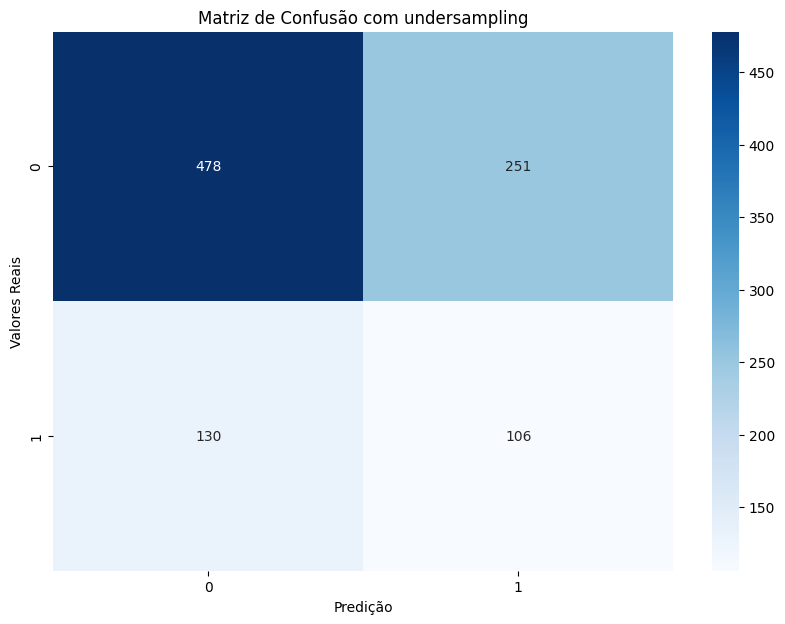

In [492]:
cm = confusion_matrix(y_test_s, y_pred_s)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predição')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão com undersampling')
plt.show()

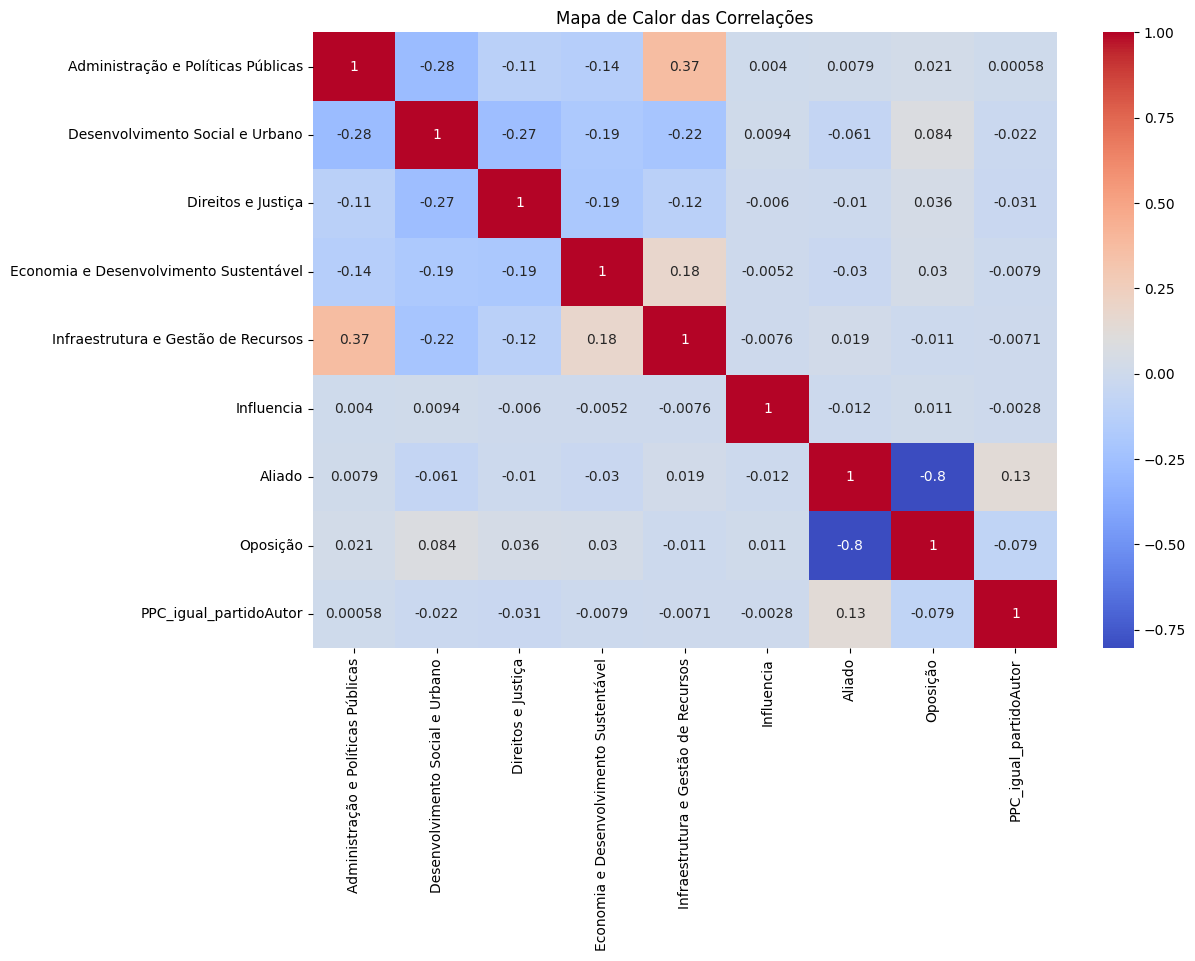

In [493]:
correlation_matrix = x.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title('Mapa de Calor das Correlações')
plt.show()

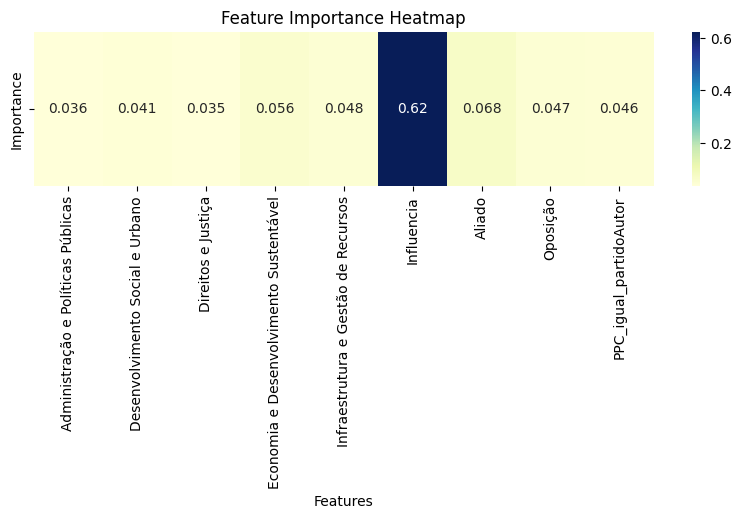

In [494]:
feature_names = x.columns
importances = clf_s.feature_importances_

importance_df = pd.DataFrame(importances.reshape(1, -1), columns=feature_names)

plt.figure(figsize=(10, 2))
sns.heatmap(importance_df, annot=True, cmap="YlGnBu", cbar=True, xticklabels=feature_names, yticklabels=["Importance"])
plt.title('Feature Importance Heatmap')
plt.xlabel('Features')
plt.show()